## Table of Content
1. Import Libraries & Dataset
2. Data Investigation
3. Data Preprocessing
4. Statistical Summary
5. Exploratory Data Analysis (EDA)
6. Customer Profiling
7. Top 10 Insights & Recommendation


# Import Libraries and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing dataset
df = pd.read_csv("original_aerofit_treadmill.csv")

# Data Investigation

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There is no null value in the dataset

In [8]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [9]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

The dataset contains the information about the three products

In [10]:
# Checking range of the age to find any unexpected value
df["Age"].min(), df["Age"].max()

(18, 50)

The range of age between 18 and 50 which is acceptable

In [11]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [12]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [13]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

No missing values or inconsistencies in the dataset, so no data cleaning needed. Categorical columns ("Product," "Gender," and "MaritalStatus") will be encoded with numerical labels (0, 1, 2, etc.) to make the analysis easier.

# Preprocessing

## Encoding Product Column

The column will be encoded as follows-\
KP281 = 0\
KP481 = 1\
KP781 = 2

In [14]:
df["Product"].replace(['KP281', 'KP481', 'KP781'], [0,1,2], inplace=True)

In [15]:
df["Product"].unique()

array([0, 1, 2], dtype=int64)

## Encoding Gender Column

The column will be encoded as follows-\
Male = 0\
Female = 1

In [16]:
df["Gender"].replace(['Male', 'Female'], [0,1], inplace=True)

In [17]:
df["Gender"].unique()

array([0, 1], dtype=int64)

## Encoding MaritalStatus Column

The column will be encoded as follows-\
Single = 0\
Partnered = 1

In [18]:
df["MaritalStatus"].replace(['Single', 'Partnered'], [0,1], inplace=True)

In [19]:
df["MaritalStatus"].unique()

array([0, 1], dtype=int64)

# Statistical Summary

## Five Point Sumary

In [20]:
df.describe()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.777778,28.788889,0.422222,15.572222,0.594444,3.455556,3.311111,53719.577778,103.194444
std,0.787866,6.943498,0.495291,1.617055,0.492369,1.084797,0.958869,16506.684226,51.863605
min,0.000000,18.000000,0.000000,12.000000,0.000000,2.000000,1.000000,29562.000000,21.000000
25%,0.000000,24.000000,0.000000,14.000000,0.000000,3.000000,3.000000,44058.750000,66.000000
50%,1.000000,26.000000,0.000000,16.000000,1.000000,3.000000,3.000000,50596.500000,94.000000
75%,1.000000,33.000000,1.000000,16.000000,1.000000,4.000000,4.000000,58668.000000,114.750000
max,2.000000,50.000000,1.000000,21.000000,1.000000,7.000000,5.000000,104581.000000,360.000000


# Oultliers

<AxesSubplot: >

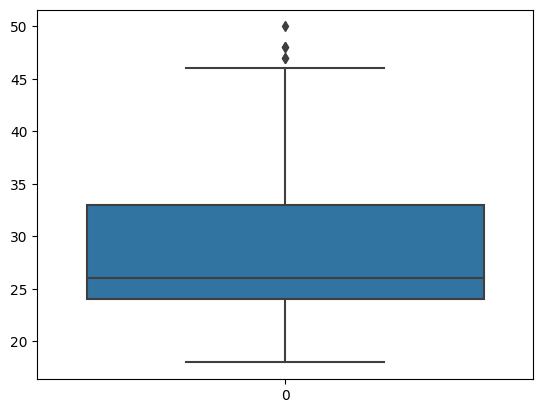

In [21]:
# outliers in Age column
sns.boxplot(df["Age"])

<AxesSubplot: >

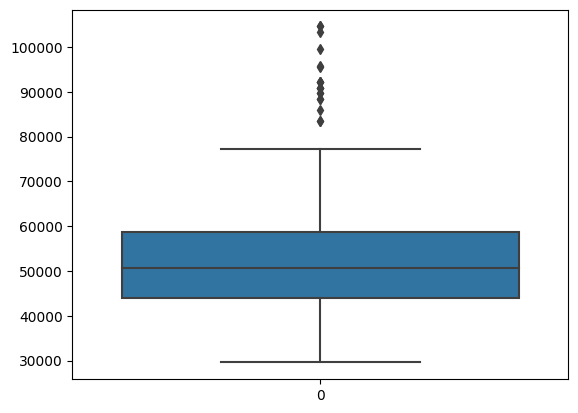

In [22]:
# outliers in Income column
sns.boxplot(df["Income"])

<AxesSubplot: >

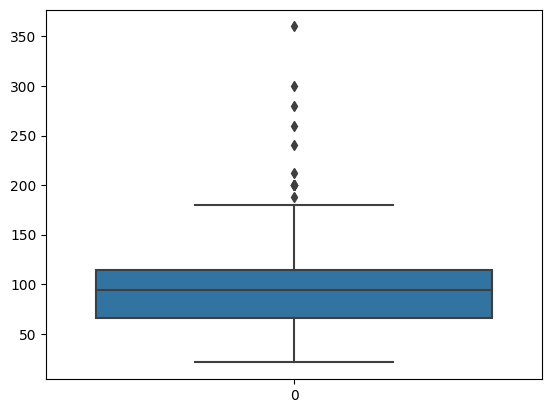

In [23]:
# outliers in Miles column
sns.boxplot(df["Miles"])

There is a few outliers in Income. But this calculation is based on all the three products. The product KP781, has less number of entries in comparison to KP281 and it is likely that the KP781 is purchased by those persons who has high income because it is more expensive. So, embalance in the data can also influence the outlier.

Simlarly, in case of Miles, KP781 will be purcahse by those who has more usage becuase it has more features and more reliable. So, again embalance in the dataset can be a reason for outlier.

As you can see in both Income and miles column the outlier is above the top whisker. Same can also be a reason for Age column. So, We need to see the outlier separately for each product.

# Correlation

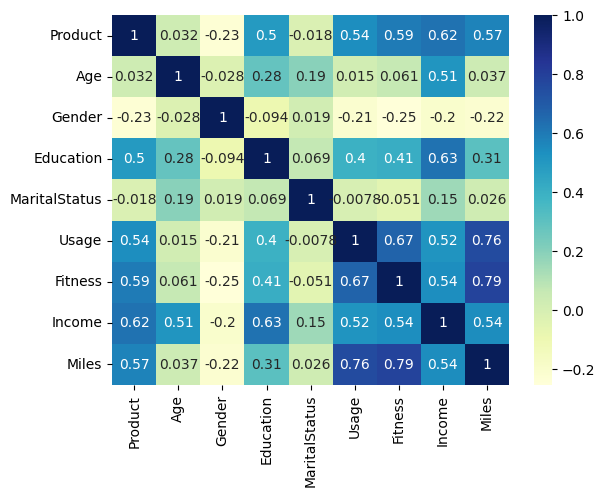

In [24]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

* **Insights**\
As we can see, the features Income, Fitness, Miles, Usage and Education are higly influences the product selection by the customer.

# Exploratory Data Analysis (EDA)

In [25]:
product_legend = ["KP281", "KP481", "KP781"]
gender_legend = ["Male", "Female"]
marital_legend = ["Single", "Partnered"]
cp = sns.color_palette().as_hex()

## 1. Distribution of each product

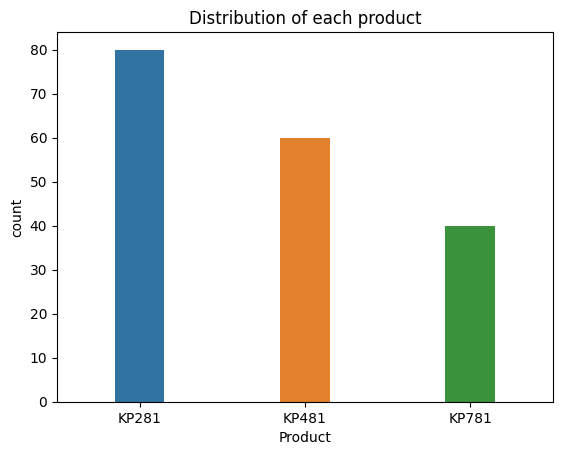

In [26]:
sns.countplot(x=df["Product"], width=0.3)
plt.xticks([0,1,2], labels=product_legend)
plt.title("Distribution of each product")
plt.show()

## 2. What fraction of the customer has bought different products (Marginal Probability)

In [27]:
prod_label = ["KP281", "KP481", "KP781", "Total"]
prod_margin = pd.crosstab(
    df["Product"], 
    df["Product"], 
    margins=True, 
    normalize=True
).round(2)
prod_margin.columns = prod_label
prod_margin.index = prod_label
prod_margin

,KP281,KP481,KP781,Total
KP281,0.44,0.00,0.00,0.44
KP481,0.00,0.33,0.00,0.33
KP781,0.00,0.00,0.22,0.22
Total,0.44,0.33,0.22,1.00


* **Insights**\
Approx 44% customers bought KP281 model, 33% customers bought KP481 model and 22% customers bought KP781

## 3. Distribution of each product across gender

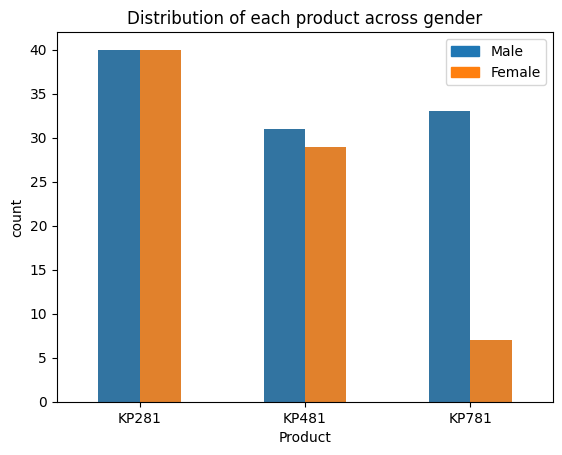

In [28]:
sns.countplot(data=df, x="Product", hue="Gender", width=0.5)
plt.legend(gender_legend)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
plt.xticks([0,1,2], labels=product_legend)
plt.xticks([0,1,2], labels=product_legend)
plt.title("Distribution of each product across gender")
plt.show()

* **Insights**\
Only 18% of female customers have purchased KP781, indicating that the product is not as popular among this demographic. This suggests a potential gap in marketing efforts, as it appears the product may not have been effectively targeted toward female customers. To tap into this market segment and increase KP781's appeal among females, the company should consider tailoring its marketing strategies specifically for the female audience

## 4. Distribution of each product across marital status

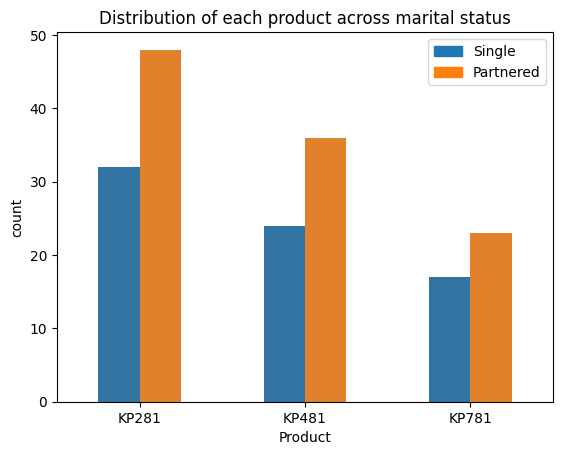

In [66]:
sns.countplot(data=df, x="Product", hue="MaritalStatus", width=0.5)
plt.legend(marital_legend)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
plt.xticks([0,1,2], labels=product_legend)
plt.xticks([0,1,2], labels=product_legend)
plt.title("Distribution of each product across marital status")
plt.show()

## 5. Comparison of age for male and female for each product

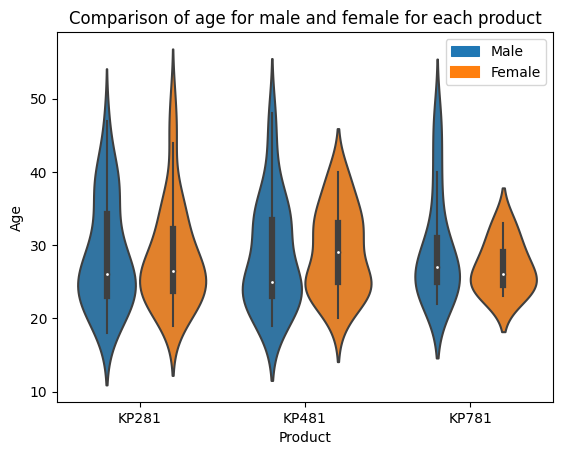

In [30]:
sns.violinplot(data=df, y="Age", x="Product", hue="Gender")
plt.legend(gender_legend)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
plt.xticks([0,1,2], labels=product_legend)
plt.title("Comparison of age for male and female for each product")
plt.show()

1. In case of product KP281, the median age of both male and female is similar.
2. In case of product KP481, the median age of female is higher than than that of female. That means less aged man has more chance to buy KP481 in comparison to female.
3. In case of the product KP781, the median age of male is slightly higher than female.

## 6. Comparison of age for Single and Partnered for each product

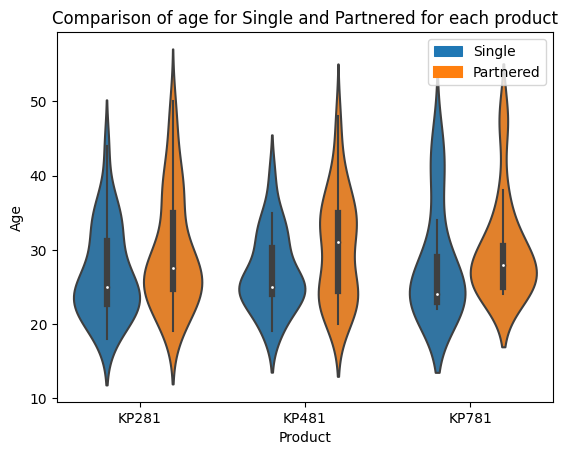

In [31]:
sns.violinplot(data=df, y="Age", x="Product", hue="MaritalStatus")
plt.legend(marital_legend, loc=1)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
plt.xticks([0,1,2], labels=product_legend)
plt.title("Comparison of age for Single and Partnered for each product")
plt.show()

* As expected the median age of the single customer is less than that of married customer across the product

## 7. Comparison of income for male and female for each product

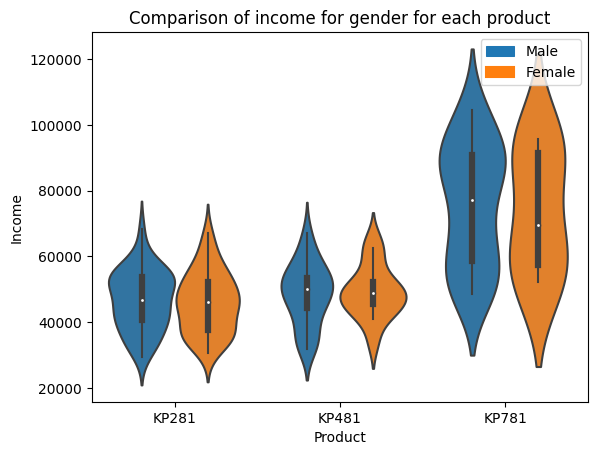

In [59]:
sns.violinplot(data=df, y="Income", x="Product", hue="Gender")
plt.legend(gender_legend, loc=0)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
plt.xticks([0,1,2], labels=product_legend)
plt.title("Comparison of income for gender for each product")
plt.show()

## 8. Distribution of Customer Age

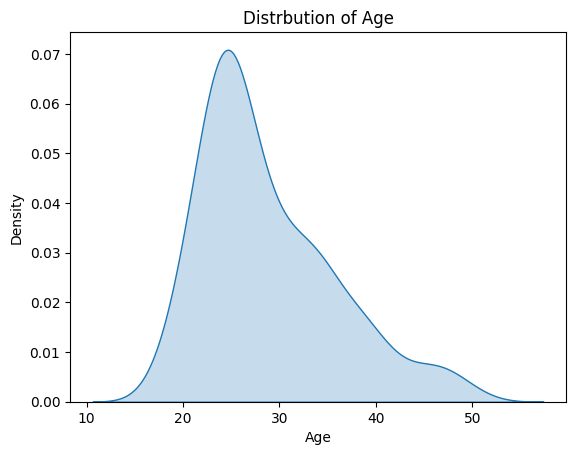

In [65]:
sns.kdeplot(x=df["Age"], fill=True)
plt.title("Distrbution of Age")
plt.show()

* **Insights**\
Most of the customers lie in the age of 20 years to 35 years

## 9. Distribution of Age across differnt products

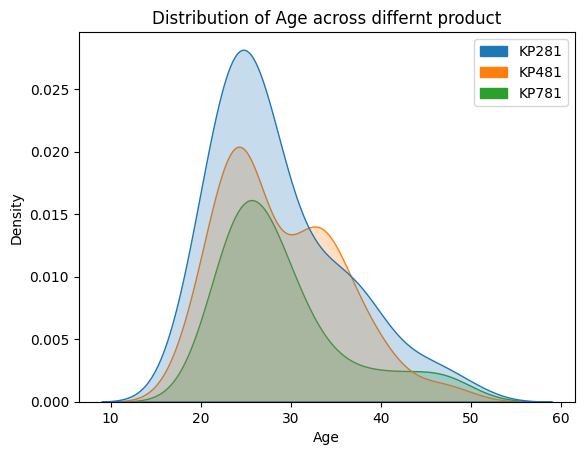

In [34]:
sns.kdeplot(x=df["Age"], hue=df["Product"], fill=True, palette=cp)
plt.legend(product_legend)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Distribution of Age across differnt product")
plt.show()

* **Insights**\
1. **KP281**: Similar to age distribution, most of the customers are also between 20 to 35 years of old in case of KP281 product. 

2. **KP481**: Again similar to age distribution, most of the customers are also between 20 to 35 years of old in case of KP481 product.

3. **KP781**: In case of KP781, The age range shrinkes. here most of the customer are between the age of 20 years to 30 years. But there is a constant distribution of ages between 35 years to 47 years. This indicates that aged person also prefers KP781 but the number of customer is less.

## 10. Distrbution of Customer Income 

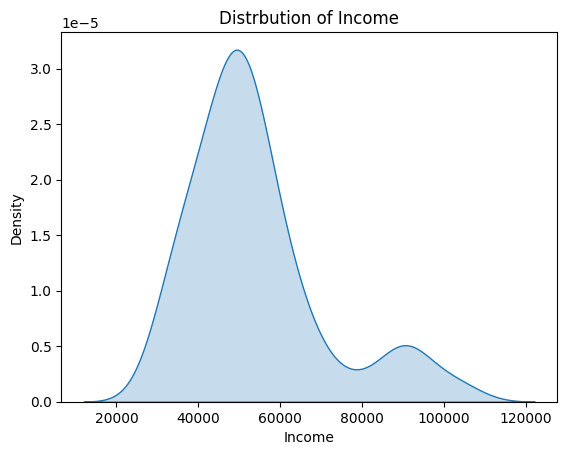

In [68]:
sns.kdeplot(x=df["Income"], fill=True)
plt.title("Distrbution of Income")
plt.show()

## 11. Distribution of Income across differnt products

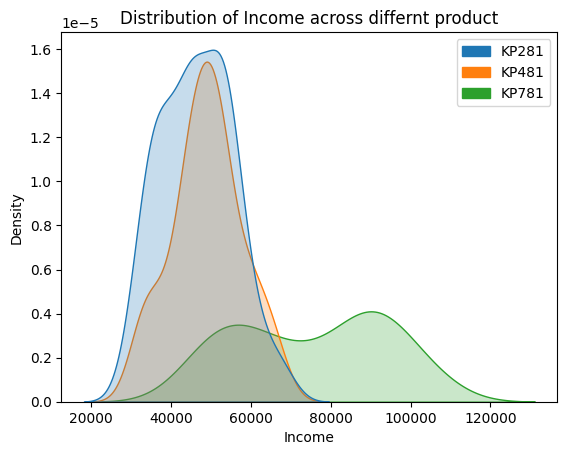

In [70]:
sns.kdeplot(x=df["Income"], hue=df["Product"], fill=True, palette=cp)
plt.legend(product_legend)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Distribution of Income across differnt product")
plt.show()

# Customer Profiling

KP781 - higher variant\
KP481 - mid variant\
KP281 - lower variant

## 1. What are the buying chances for male and female for each product (Conditional Probability )

In [35]:
joint_gender=pd.crosstab(df["Product"], df["Gender"], normalize=True)
joint_gender.columns = gender_legend
joint_gender.index = product_legend
joint_gender

,Male,Female
KP281,0.222222,0.222222
KP481,0.172222,0.161111
KP781,0.183333,0.038889


In [36]:
total_gender = joint_gender.sum(axis=0)
total_gender

Male      0.577778
Female    0.422222
dtype: float64

In [37]:
cond_gender = joint_gender.divide(total_gender, axis=1).round(2)
cond_gender

,Male,Female
KP281,0.38,0.53
KP481,0.30,0.38
KP781,0.32,0.09


In [38]:
print(f"Probibilty of buying KP281 given that the customer is male:\
    {cond_gender.iloc[0,0]}")
print(f"Probibilty of buying KP481 given that the customer is male:\
    {cond_gender.iloc[1,0]}")
print(f"Probibilty of buying KP781 given that the customer is male:\
    {cond_gender.iloc[2,0]}")
print(f"Probibilty of buying KP281 given that the customer is female:\
  {cond_gender.iloc[0,1]}")
print(f"Probibilty of buying KP481 given that the customer is female:\
  {cond_gender.iloc[1,1]}")
print(f"Probibilty of buying KP781 given that the customer is female:\
  {cond_gender.iloc[2,1]}")

Probibilty of buying KP281 given that the customer is male:    0.38
Probibilty of buying KP481 given that the customer is male:    0.3
Probibilty of buying KP781 given that the customer is male:    0.32
Probibilty of buying KP281 given that the customer is female:  0.53
Probibilty of buying KP481 given that the customer is female:  0.38
Probibilty of buying KP781 given that the customer is female:  0.09


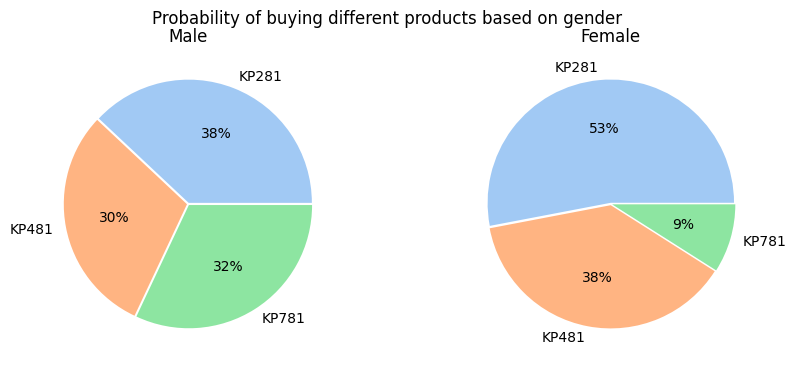

In [39]:
pie_cp = sns.color_palette("pastel")
explode = [0.01,0.01,0.01]

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].pie(
    [cond_gender.iloc[0,0], cond_gender.iloc[1,0], cond_gender.iloc[2,0]], 
    labels=product_legend, 
    colors=pie_cp, 
    explode=explode, 
    autopct='%.0f%%'
)
ax[0].set_title("Male")

ax[1].pie(
    [cond_gender.iloc[0,1], cond_gender.iloc[1,1], cond_gender.iloc[2,1]], 
    labels=product_legend, 
    colors=pie_cp, 
    explode=explode, 
    autopct='%.0f%%'
)
ax[1].set_title("Female")

fig.suptitle("Probability of buying different products based on gender")
plt.show()

* **Insights**
1. In case of Male,the probability of buying is almost same for all the 3 products.
2. In case of Female, The probability of buying KP281 is highest (53%) whereas probability of buying KP781 is lowest (9%). IN case of KP481 probabilty is 38%. 

## 2. What are the buying chances for Single and Partnered for each product (Conditional Probability )

In [40]:
joint_marital=pd.crosstab(df["Product"], df["MaritalStatus"], normalize=True)
joint_marital.columns = marital_legend
joint_marital.index = product_legend
joint_marital

,Single,Partnered
KP281,0.177778,0.266667
KP481,0.133333,0.200000
KP781,0.094444,0.127778


In [41]:
total_marital = joint_marital.sum(axis=0)
total_marital

Single       0.405556
Partnered    0.594444
dtype: float64

In [42]:
cond_marital = joint_marital.divide(total_marital, axis=1).round(2)
cond_marital

,Single,Partnered
KP281,0.44,0.45
KP481,0.33,0.34
KP781,0.23,0.21


In [43]:
print(f"Probibilty of buying KP281 given that the customer is single:\
    {cond_marital.iloc[0,0]}")
print(f"Probibilty of buying KP481 given that the customer is single:\
    {cond_marital.iloc[1,0]}")
print(f"Probibilty of buying KP781 given that the customer is single:\
    {cond_marital.iloc[2,0]}")
print(f"Probibilty of buying KP281 given that the customer is partnered:\
 {cond_marital.iloc[0,1]}")
print(f"Probibilty of buying KP481 given that the customer is partnered:\
 {cond_marital.iloc[1,1]}")
print(f"Probibilty of buying KP781 given that the customer is partnered:\
 {cond_marital.iloc[2,1]}")

Probibilty of buying KP281 given that the customer is single:    0.44
Probibilty of buying KP481 given that the customer is single:    0.33
Probibilty of buying KP781 given that the customer is single:    0.23
Probibilty of buying KP281 given that the customer is partnered: 0.45
Probibilty of buying KP481 given that the customer is partnered: 0.34
Probibilty of buying KP781 given that the customer is partnered: 0.21


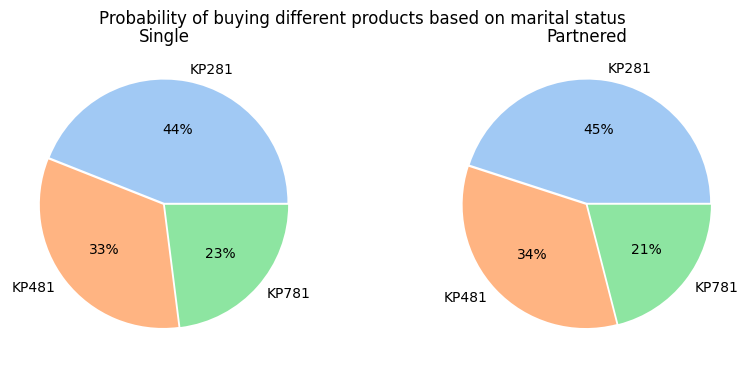

In [44]:
pie_cp = sns.color_palette("pastel")
explode = [0.01,0.01,0.01]

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].pie(
    [cond_marital.iloc[0,0], cond_marital.iloc[1,0], cond_marital.iloc[2,0]], 
    labels=product_legend, 
    colors=pie_cp, 
    explode=explode, 
    autopct='%.0f%%'
)
ax[0].set_title("Single")

ax[1].pie(
    [cond_marital.iloc[0,1], cond_marital.iloc[1,1], cond_marital.iloc[2,1]], 
    labels=product_legend, 
    colors=pie_cp, 
    explode=explode, 
    autopct='%.0f%%'
)
ax[1].set_title("Partnered")

fig.suptitle("Probability of buying different products based on marital status")
plt.show()

* **Insights**\
Probability of buying the products KP281, KP481 and KP781 are almost similar in both single and partnered customer

## 3. What are the chances of buying different product for single male

In [45]:
colname = pd.MultiIndex.from_tuples([
    ("Single", "Male"), 
    ("Single", "Female"),
    ("Partnered", "Male"), 
    ("Partnered", "Female"), 
])
joint_gm = pd.crosstab(
    df["Product"], 
    [df["MaritalStatus"], df["Gender"]], 
    normalize = True
)
joint_gm.columns = colname
joint_gm.index = product_legend
joint_gm

Single           Partnered          
           Male    Female      Male    Female
KP281  0.105556  0.072222  0.116667  0.150000
KP481  0.055556  0.077778  0.116667  0.083333
KP781  0.077778  0.016667  0.105556  0.022222

In [46]:
total_gm = joint_gm.sum(axis=0)
total_gm

Single     Male      0.238889
           Female    0.166667
Partnered  Male      0.338889
           Female    0.255556
dtype: float64

In [47]:
cond_gm = joint_gm.divide(total_gm, axis=1).round(2)
cond_gm

Single        Partnered       
        Male Female      Male Female
KP281   0.44   0.43      0.34   0.59
KP481   0.23   0.47      0.34   0.33
KP781   0.33   0.10      0.31   0.09

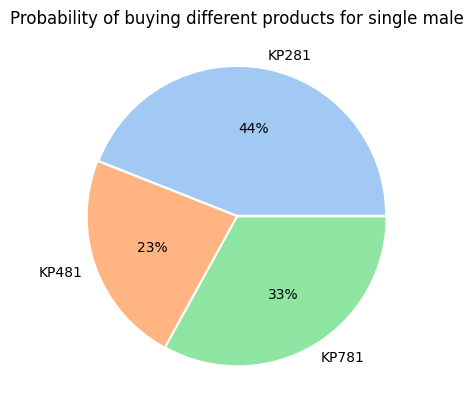

In [48]:
plt.pie(
    [cond_gm.iloc[0,0], cond_gm.iloc[1,0], cond_gm.iloc[2,0]],
    labels = product_legend,
    colors = pie_cp,
    explode=explode,
    autopct='%.0f%%'
)
plt.title("Probability of buying different products for single male")
plt.show()

* **Insights**\
In the gender-based analysis, all three products showed almost equal probability of being sold if the customer is male. However, in the analysis for single males, KP281 has the highest probability of being sold (44%), while KP481 has the lowest probability (only 23%). This indicates a difference in preference among single male customers compared to the general male customer base.

## 4. What are the chances of buying different product for single female

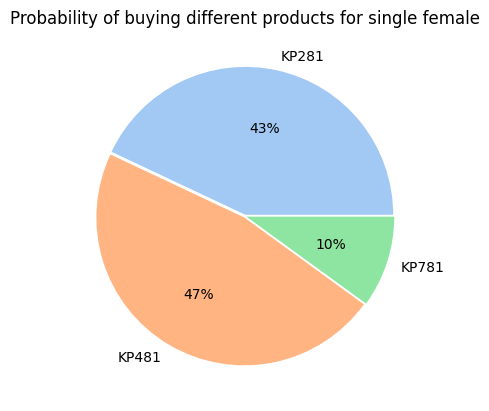

In [49]:
plt.pie(
    [cond_gm.iloc[0,1], cond_gm.iloc[1,1], cond_gm.iloc[2,1]],
    labels = product_legend,
    colors = pie_cp,
    explode=explode,
    autopct='%.0f%%'
)
plt.title("Probability of buying different products for single female")
plt.show()

* **Insights**\
For single females, KP781 has the lowest probability of being purchased (10%). Surprisingly, KP481 has the highest probability (47%), surpassing KP281 in preference among this demographic.

## 5. What are the chances of buying different product for partnered male

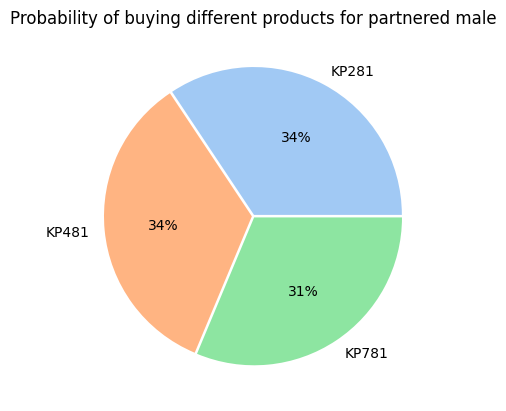

In [50]:
plt.pie(
    [cond_gm.iloc[0,2], cond_gm.iloc[1,2], cond_gm.iloc[2,2]],
    labels = product_legend,
    colors = pie_cp,
    explode=explode,
    autopct='%.0f%%'
)
plt.title("Probability of buying different products for partnered male")
plt.show()

* **Insights**\
The probability is almost equal across the product if the customer is partnered male

## 6. What are the chances of buying different product for partnered female

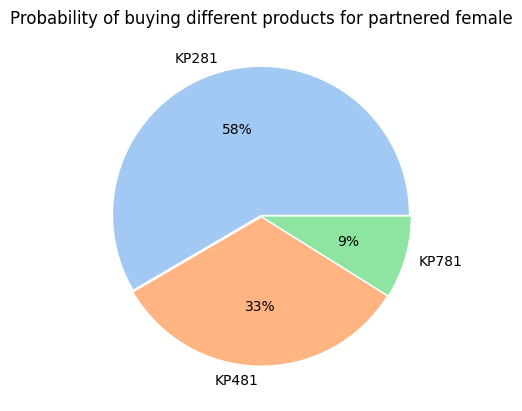

In [51]:
plt.pie(
    [cond_gm.iloc[0,3], cond_gm.iloc[1,3], cond_gm.iloc[2,3]],
    labels = product_legend,
    colors = pie_cp,
    explode=explode,
    autopct='%.0f%%'
)
plt.title("Probability of buying different products for partnered female")
plt.show()

* **Insights**\
Partnered females have a higher probability (58%) of buying KP281, but KP781 still has the lowest probability (9%) among all the products.

## 7. Segmentation based on Income and Usage

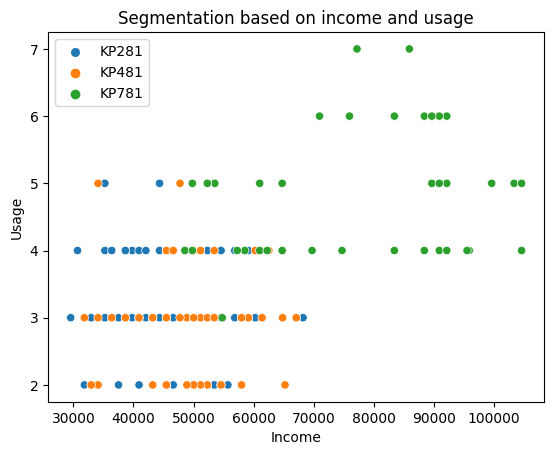

In [52]:
sns.scatterplot(x=df["Income"], y=df["Usage"], hue=df["Product"], palette=cp)
plt.legend(product_legend, loc=2)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Segmentation based on income and usage")
plt.show()

* **Insights**\
The customer having income atleast \\$60000 and their expected weekly usage is atleast 4 days, prefers higher variant of the treadmill and they have higher probability to buy the product KP781 (the higher variant).

## 8. Segmentation based on Income and Fitness

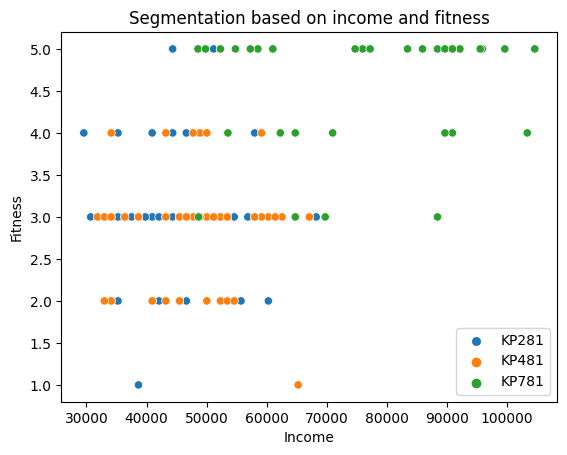

In [53]:
sns.scatterplot(x=df["Income"], y=df["Fitness"], hue=df["Product"], palette=cp)
plt.legend(product_legend, loc=4)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Segmentation based on income and fitness")
plt.show()

* **Insights**\
The customers with a fitness rating of at least 4 and bought KP781 tend to have a minimum income of around \\$55,000. On the other hand, customers with a fitness rating of at most 3 and bought KP781 have a minimum income around \\$70,000. This finding indicates that more fitness enthusiasts, even with slightly lower incomes, are inclined to purchase the higher product variant, suggesting that their passion for fitness and health may outweigh the consideration of their income when making a purchase decision.

## 9. Segmentation based on Income and Miles

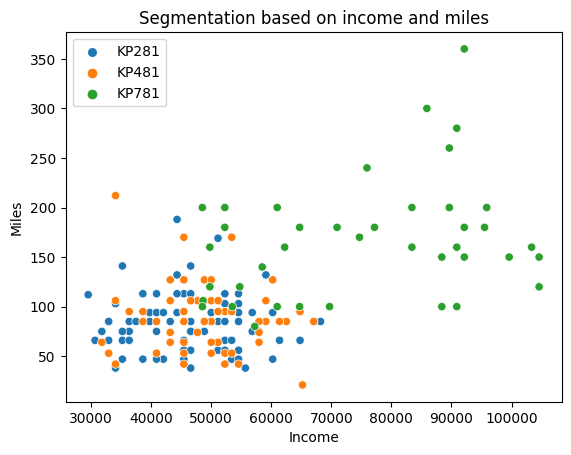

In [54]:
sns.scatterplot(x=df["Income"], y=df["Miles"], hue=df["Product"], palette=cp)
plt.legend(product_legend, loc=2)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Segmentation based on income and miles")
plt.show()

* **Insights**\
Similar to Usage, here also the customer having income greater than \\$60000 and average weekly running distance is greater than 100 miles has higher probability to buy the product KP781

## 10. Segmentation based on Income and Education

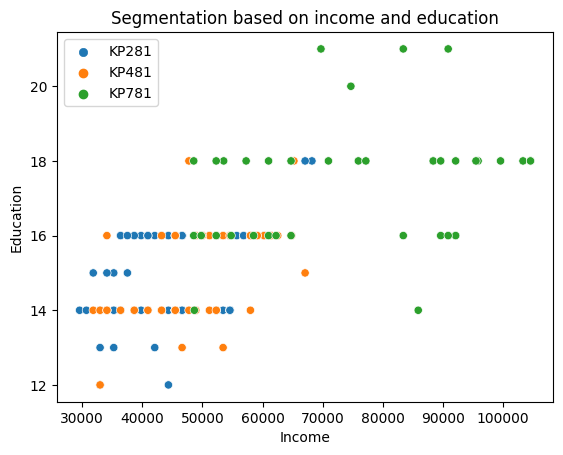

In [55]:
sns.scatterplot(x=df["Income"], y=df["Education"], hue=df["Product"], palette=cp)
plt.legend(product_legend, loc=2)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Segmentation based on income and education")
plt.show()

* **Insights**\
Highly educated individuals (with 18 years of education or more) typically have higher salaries and tend to prefer the higher product variant. However, what's interesting is that even when their salary is as low as $50,000, highly educated customers still show a preference for KP781, the higher variant. This finding highlights that highly educated customers have a strong inclination towards the higher-end product, regardless of their income level.

## 11. Segmentation based on Income and Age

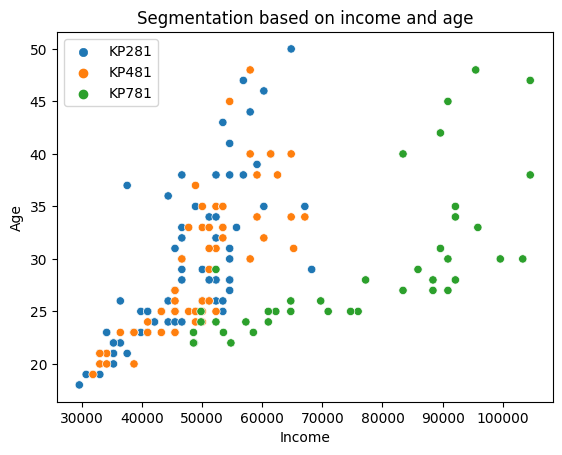

In [56]:
sns.scatterplot(x=df["Income"], y=df["Age"], hue=df["Product"], palette=cp)
plt.legend(product_legend, loc=2)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Segmentation based on income and age")
plt.show()

* **Insights**\
Customers with an income greater than \\$70,000 generally tend to prefer the higher product variant. However, an interesting phenomenon occurs when the income falls within the range of \\$50,000 to \\$70,000. Younger customers in this income bracket exhibit a preference for the higher variant even though their salary is relatively lower. This trend is relatable because many younger customers are likely to be single and have fewer expenses. As a result, they can afford to invest in a more expensive treadmill, aligning with their preference for the higher variant.

## 12. Segmentation based on Income and Marital Status

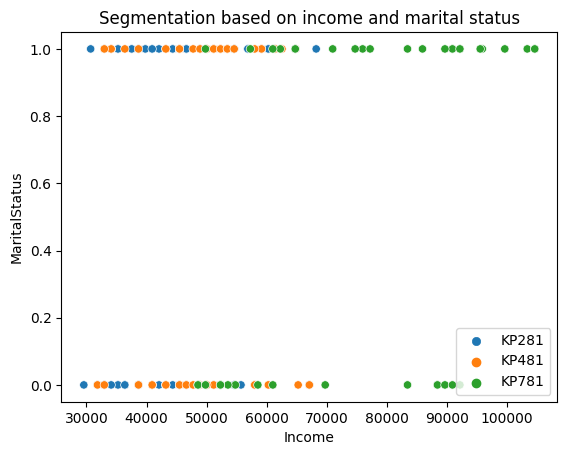

In [57]:
sns.scatterplot(x=df["Income"], y=df["MaritalStatus"], hue=df["Product"], palette=cp)
plt.legend(product_legend, loc=4)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(cp[0])
leg.legendHandles[1].set_color(cp[1])
leg.legendHandles[2].set_color(cp[2])
plt.title("Segmentation based on income and marital status")
plt.show()

* **Insights**\
As observed in the previous section, single individuals tend to prefer the higher product variant even when their income is slightly lower. On the other hand, partnered individuals show a preference for the higher variant when their income is a bit higher.

# Top Insights & Recommendations

1. Only 18% of female customers have purchased KP781, indicating that the product is not as popular among this demographic. This suggests a potential gap in marketing efforts, as it appears the product may not have been effectively targeted toward female customers. To tap into this market segment and increase KP781's appeal among females, the company should consider tailoring its marketing strategies specifically for the female audience.


2. The likelihood of purchasing is almost consistent across all three products for male customers. However, among single male customers, the probability of buying KP281 is notably higher at 44%, whereas KP481 exhibits the lowest probability with just 23% chance of being sold.


3. Among female customers, the highest probability of purchasing is associated with KP281 at 53%, while the lowest probability is observed for KP781 with only 9% chance of being sold. However, when considering single female customers, KP481 emerges as the product with the highest probability (47%) of being sold, boasting a 47% probability of purchase.


4. The majority of the Aerofit treadmill customers fall between the age range of 20 to 35 years, indicating a target demographic of younger individuals. However, for KP781, the age range narrows further, with most customers being between 20 to 30 years old. But there is a consistent distribution of customers between the ages of 35 to 47 years, suggesting that older individuals also prefer KP781, although the number of customers in this age group is comparatively lower. This observation suggests that the product KP781 has appeal across different age groups, but its primary attraction remains among younger customers.


5. In the case of product KP481, the median age of male customers is lower than that of female customers. This suggests that younger men have a higher chance of buying KP481 compared to females. In other words, the product seems to be more popular among younger male customers compared to female customers, whose median age is higher.


5. Younger customers (age <= 25 years) show a preference for purchasing KP781 when their income exceeds \\$50,000. On the other hand, for older customers (age > 25 years), the probability of buying KP781 increases significantly when their income surpasses \\$70,000. For customers with an income less than \\$50,000 or aged over 25 years, the primary choices tend to be KP281 or KP481.


6. Similar to the age pattern, single individuals exhibit a preference for purchasing KP781 even when their salary is slightly lower (salary >= \\$50,000). In contrast, partnered customers tend to favor KP781 when their salary is relatively higher (salary >= \\$65,000). This observation is practically justifiable as single individuals typically have fewer expenses compared to married individuals, allowing them to allocate more of their income towards higher-tier products like KP781. On the other hand, partnered customers may prioritize other financial responsibilities, leading them to opt for KP781 when their income is more comfortable.


7. Highly educated (with 18 years of education or more) individuals usually have higher incomes and tend to prefer the higher variant (KP781). An interesting observation is that individuals with at least 18 years of education favor KP781 even when their salary is as low as \\$50,000, indicating a strong preference for the higher variant among highly educated customers. On the other hand, those with less than 18 years of education tend to choose KP781 only when their income is above \\$65,000. Otherwise, they prefer the lower or mid-range products (KP281 or KP481). This finding highlights that highly educated customers have a strong inclination towards the higher-end product, regardless of their income level.


8. Customers who are willing to cover a distance of 100 miles or more in a week and have an income greater than \\$60,000 have a higher probability of purchasing the product KP781. 


9. Like above insights, customers who are willing to invest at least 4 days in a week and have an income of at least \\$60,000 also have higher chances of buying the product KP781. This finding suggests that customers who are financially capable and committed to using the treadmill frequently are more likely to invest in the top-tier product option.


10. Fitness enthusiast customers (with a fitness rating of 4 or higher) show a tendency to buy KP781 even when their income is relatively low (salary >= \\$55,000). However, for customers with a fitness rating less than 4, they usually prefer either KP281 or KP481. In cases where the fitness rating is less than 4, the probability of buying KP781 increases slightly when the customer's income exceeds \\$70,000.


.

----------------------------------------------------- Thank You ---------------------------------------------------------